<a href="https://colab.research.google.com/github/romitbarua/MultiModalDeepFake/blob/main/TestingNotebooks/metadata_update_audio_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json
# Importing library 
import csv 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import IPython.display as ipd
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
filename = '/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb_v1.2/wav2lip_metadata_updated.csv'
metadata_df = pd.read_csv(filename)

In [ ]:
all_uniq_ids = metadata_df.source.unique()
#select 20
analysis_ids = all_uniq_ids[:20]
#list for filepaths
wav_filepaths = []
sources = []
color = []
targets = []
category = []
#get data
col = 1
for id in analysis_ids:
  temp_df = metadata_df[metadata_df.source==id]
  wav_filepaths.extend(temp_df.wav_filepath.to_list())
  sources.extend(temp_df.source.to_list())
  targets.extend(temp_df.target1.to_list())
  category.extend(temp_df.category.to_list())
  color.extend(len(temp_df.source.to_list())*[col])
  col += 1

In [ ]:
y,sr = librosa.load(wav_filepaths[0])

In [ ]:
y.shape, sr

((222705,), 22050)

In [ ]:
librosa.get_duration(y,sr)

10.1

In [ ]:
ipd.Audio(data=y, rate=sr)

In [ ]:
metadata_df.columns

Index(['Unnamed: 0', 'source', 'target1', 'target2', 'method', 'category',
       'type', 'race', 'gender', 'filename', 'directory_path', 'mp4_filepath',
       'utterance_file', 'wav_filepath'],
      dtype='object')

In [ ]:
def get_audio_length(wav_file):
  file_items = wav_file.split('/')
  print("handling file {}".format(file_items[-1]))
  try:
    y,sr = librosa.load(wav_file)
    return librosa.get_duration(y,sr)
  except:
    return np.nan 

In [ ]:
print(get_audio_length(wav_filepaths[0]))

handling file 00109.wav
10.1


In [ ]:
metadata_df.head()

,Unnamed: 0,source,target1,target2,method,category,type,race,gender,filename,directory_path,mp4_filepath,utterance_file,wav_filepath
0,0,id00076,-,-,real,A,RealVideo-RealAudio,African,men,00109.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...,NaN,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...
1,1,id00166,-,-,real,A,RealVideo-RealAudio,African,men,00010.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...,NaN,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...
2,2,id00173,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...,NaN,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...
3,3,id00366,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...,NaN,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...
4,4,id00391,-,-,real,A,RealVideo-RealAudio,African,men,00052.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...,NaN,/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb...


In [ ]:
metadata_df['audio_length'] = metadata_df.wav_filepath.apply(get_audio_length)

Streaming output truncated to the last 5000 lines.
handling file 00053_id06254_wavtolip.wav
handling file 00053_id06343_wavtolip.wav
handling file 00053_id06428_wavtolip.wav
handling file 00083_id00080_wavtolip.wav
handling file 00083_id02089_wavtolip.wav
handling file 00083_id03897_wavtolip.wav
handling file 00083_id04070_wavtolip.wav
handling file 00083_id04583_wavtolip.wav
handling file 00083_id05845_wavtolip.wav
handling file 00083_id05920_wavtolip.wav
handling file 00083_id06268_wavtolip.wav
handling file 00083_id06438_wavtolip.wav
handling file 00083_id06445_wavtolip.wav
handling file 00092_id02310_wavtolip.wav
handling file 00092_id03985_wavtolip.wav
handling file 00092_id04582_wavtolip.wav
handling file 00092_id05478_wavtolip.wav
handling file 00092_id05845_wavtolip.wav
handling file 00092_id06254_wavtolip.wav
handling file 00092_id06343_wavtolip.wav
handling file 00092_id06752_wavtolip.wav
handling file 00092_id07377_wavtolip.wav
handling file 00092_id07686_wavtolip.wav
handli

In [ ]:
filename = '/content/drive/MyDrive/FakeAVCeleb/FakeAVCeleb_v1.2/wav2lip_metadata_updated.csv'
metadata_df.to_csv(filename)

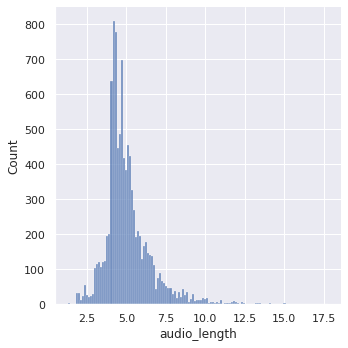

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.displot(data=metadata_df, x="audio_length")